<a href="https://colab.research.google.com/github/rithana01/portfolio/blob/main/EDA%20on%20GenAI%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WQD 7005 - Assignment Summary Report**

Prepared by: Rithana Gunasegaran (23085726)

Prepared for: Prof. Dr. Teh Ying Wah

# **Title: Exploratory Data Analysis and Preprocessing of Simulated Patient Vital Signs Dataset**


# **1. Introduction**

This report presents the exploratory data analysis (EDA) and preprocessing conducted on a simulated dataset of 500 patients monitored over 30 days. The dataset includes six vital signs (SpO2, heart rate, temperature, systolic and diastolic blood pressure, weight, blood glucose), timestamps, and questionnaire data (smoking status, diabetes condition, and exercise frequency).

A synthetic dataset was generated by ChatGPT 4o using Python libraries such as NumPy and Pandas


> **Prompt Used for Dataset Simulation and Analysis Support:**

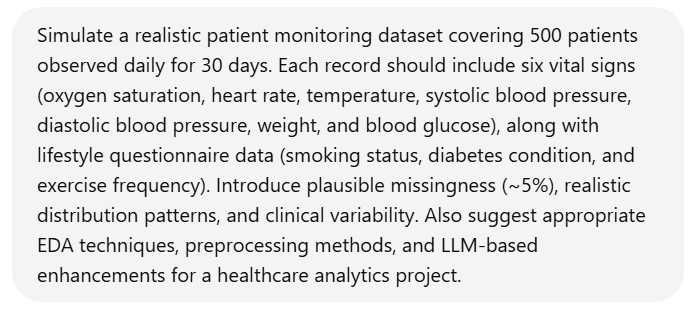

However, above code did not provide me the dataset that is satisfactory for the following EDA and preprocessing steps, hence after trouble shooting below is the final prompt i used;

# **2. Data Simulator**

The following prompt was crafted and submitted to ChatGPT 4o to simulate the synthetic healthcare patient monitoring dataset again:

> **Prompt:**  
>  
> "Generate Python code to simulate a realistic healthcare patient monitoring dataset. The dataset should consist of 500 unique patients, each observed daily over 30 days, resulting in a total of 15,000 timestamped records.  
>  
> Each record should include six vital signs:  
> - Oxygen saturation (SpO₂)  
> - Heart rate  
> - Temperature  
> - Systolic blood pressure  
> - Diastolic blood pressure  
> - Weight  
> - Blood glucose  
>  
> Assign clinically appropriate statistical distributions for each vital sign (e.g., normal distribution for most vitals, log-normal for blood glucose).  
>  
> Include associated questionnaire data per patient, with the following distributions:  
> - Smoking status: 20% smokers  
> - Diabetes condition: 25% prevalence  
> - Exercise frequency: distributed realistically among 'Rarely', 'Occasionally', and 'Frequently' categories.  
>  
> Introduce approximately 5% random missingness across the vital sign fields to reflect sensor error or data collection lapses.  
>  
> Structure the dataset for compatibility with downstream Exploratory Data Analysis (EDA) and preprocessing workflows. Provide clean, modular, and well-commented Python code."

Following this prompt, a synthetic dataset was generated using Python libraries (NumPy, Pandas) and integrated with realistic clinical variability and missingness patterns.


  **Timeframe and Frequency:** Each patient
was monitored daily over 30 days, generating 15,000 total records.

 **Vital Signs Generation:**

- SpO2 (%): Simulated using a normal distribution (mean = 97, std = 1.5).

*  Heart Rate (bpm): Normally distributed with mean = 75 and std = 10.

*  Temperature (°C): Mean = 36.8, std = 0.4.

*  Blood Pressure (systolic/diastolic mmHg): Simulated with means = 120/80 and std = 15/10 respectively.

*  Weight (kg): Varied across patients (mean = 70, std = 15), reflecting a general adult population.

*  Blood Glucose (mg/dL): Modeled with a slight right-skew using log-normal distribution.

**Questionnaire Data:**

*  Smoking Status: 'Yes' or 'No' with 20% smokers.

*  Diabetes Condition: 25% prevalence.

*  Exercise Frequency: Categorized as 'Rarely', 'Occasionally', or 'Frequently', with realistic distribution.

In [ ]:
import pandas as pd
import numpy as np
import random
import string

np.random.seed(42)
n_patients = 500
n_days = 30
total_records = n_patients * n_days

patient_ids = np.repeat(np.arange(1, n_patients + 1), n_days)
dates = np.tile(pd.date_range(start='2024-01-01', periods=n_days), n_patients)
smoker_status = np.random.choice(['Yes', 'No'], size=n_patients, p=[0.2, 0.8])
diabetic_status = np.random.choice(['Yes', 'No'], size=n_patients, p=[0.25, 0.75])
smoker_map = dict(zip(range(1, n_patients + 1), smoker_status))
diabetic_map = dict(zip(range(1, n_patients + 1), diabetic_status))

df = pd.DataFrame({
    'PatientID': patient_ids,
    'Date': dates,
    'SpO2': np.random.normal(97, 1.5, total_records),
    'HeartRate': np.random.normal(75, 10, total_records),
    'Temperature': np.random.normal(36.8, 0.4, total_records),
    'SystolicBP': np.random.normal(120, 15, total_records),
    'DiastolicBP': np.random.normal(80, 10, total_records),
    'Weight': np.random.normal(70, 15, total_records),
    'BloodGlucose': np.random.normal(100, 15, total_records),
})

df['Smoker'] = df['PatientID'].map(smoker_map)
df['Diabetic'] = df['PatientID'].map(diabetic_map)

def generate_clinical_note(row):
    note = []
    if row['Diabetic'] == 'Yes':
        note.append("Patient reports frequent urination and fatigue.")
    if row['Smoker'] == 'Yes':
        note.append("History of smoking. Occasional cough noted.")
    if row['SystolicBP'] > 135:
        note.append("Elevated blood pressure recorded. Monitor closely.")
    if row['HeartRate'] > 100:
        note.append("Mild tachycardia observed. Consider ECG if persistent.")
    if not note:
        note.append("Patient stable. No unusual complaints.")
    return " ".join(note)

df['ClinicalNote'] = df.apply(generate_clinical_note, axis=1)

# Introduce missingness
for i, row in df.iterrows():
    if row['Diabetic'] == 'No' and np.random.rand() < 0.08:
        df.at[i, 'BloodGlucose'] = np.nan
    elif row['Diabetic'] == 'Yes' and np.random.rand() < 0.03:
        df.at[i, 'BloodGlucose'] = np.nan
for col in ['SpO2', 'HeartRate', 'Temperature', 'SystolicBP', 'DiastolicBP', 'Weight']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan



# 3. Exploratory Data Analysis (EDA)

This section focuses on summarizing the characteristics, distributions, trends, and relationships within the simulated healthcare patient dataset. To enhance the exploratory process, prompts were submitted to **Gemini AI** to generate both basic and advanced EDA strategies.

> **Main EDA Prompt (Gemini):**  
>  
> "Using Python (preferably Pandas, Seaborn, Matplotlib), guide me through performing comprehensive exploratory data analysis (EDA) for a healthcare patient dataset.  
>  
> The dataset contains daily vital signs for 500 patients over 30 days, including:  
> - SpO₂ (oxygen saturation)  
> - Heart rate  
> - Temperature  
> - Systolic blood pressure  
> - Diastolic blood pressure  
> - Weight  
> - Blood glucose  
> Plus questionnaire data: Smoking status, Diabetes status, Exercise frequency.  
>  
> Please suggest EDA steps that would:  
> - Summarize distributions and central tendencies  
> - Identify missing data patterns  
> - Detect anomalies or outliers (recommend a method)  
> - Analyze relationships between lifestyle factors and vitals (e.g., glucose vs exercise)  
> - Visualize temporal patterns (e.g., heart rate over time)  
> Provide clean Python code with clear comments and suggest how findings could relate clinically."

---

> **Advanced EDA Insights Prompt (Gemini):**  
>  
> "Recommend additional EDA techniques for healthcare datasets that could reveal hidden clinical patterns.  
> - Should I group patients by diabetic status and visualize vitals?  
> - Should I apply PCA or clustering?  
> Suggest Python code for at least one advanced visualization (e.g., violin plots, PCA scatterplot) and briefly explain what clinical insights could be drawn from each plot."

---

Using these prompts, the EDA phase included:  
- Histograms, boxplots, violin plots grouped by lifestyle factors  
- Time series visualizations for vital sign trends  
- Missing data visualization  
- Correlation analysis among numerical features  
- Anomaly detection using z-scores
- AI-suggested clinical interpretations at key stages


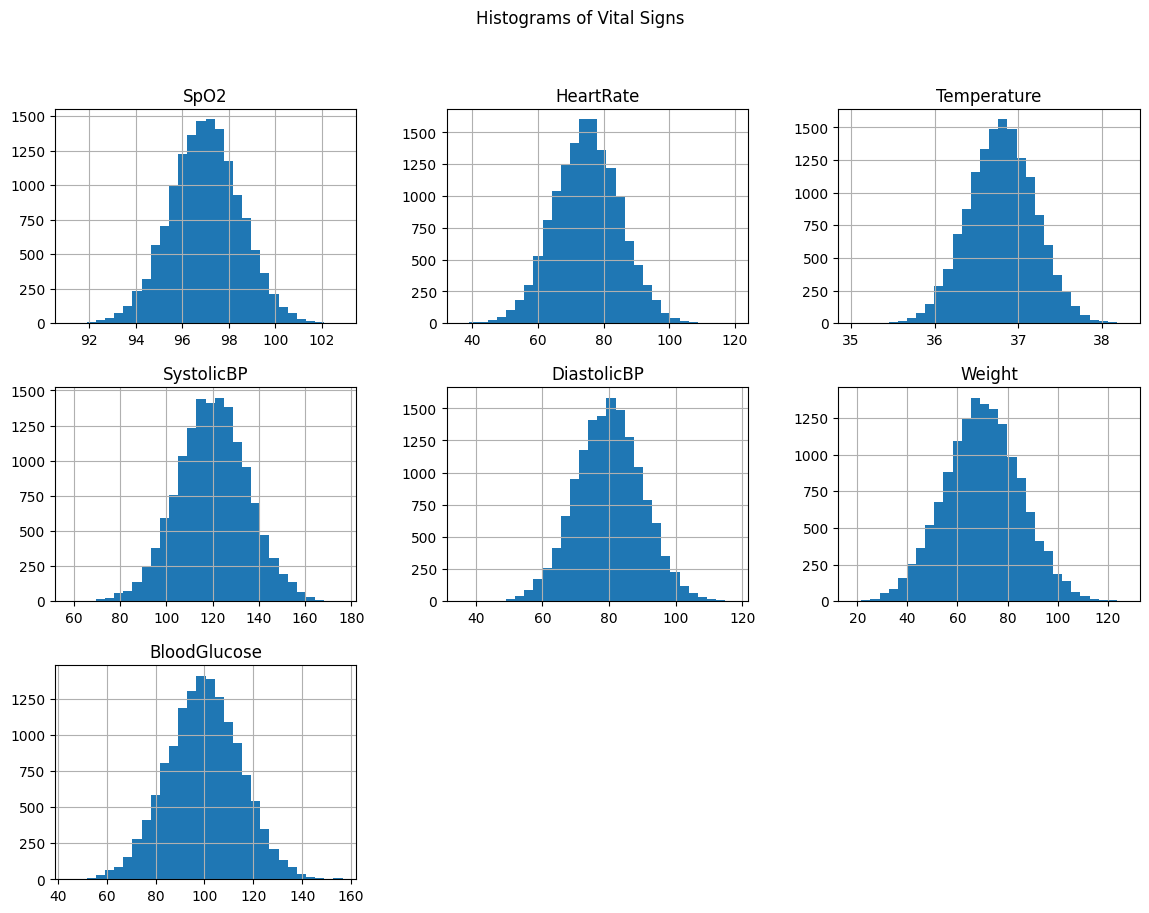

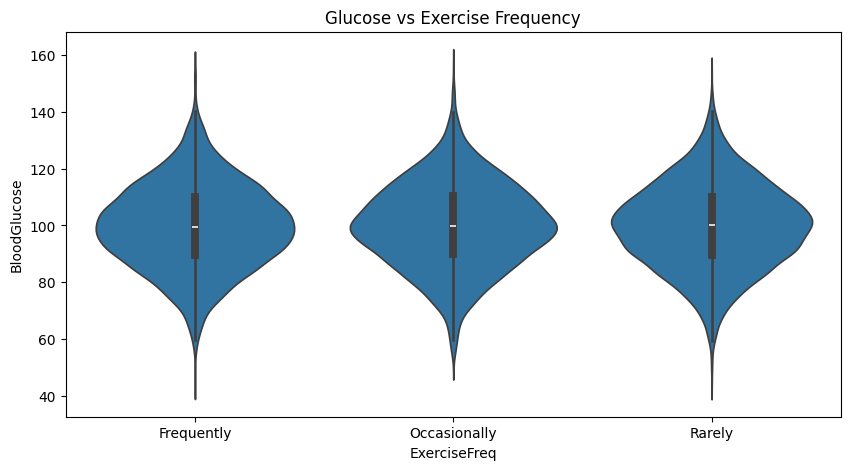

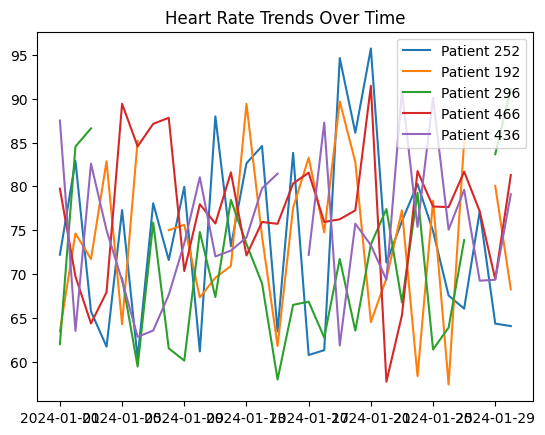

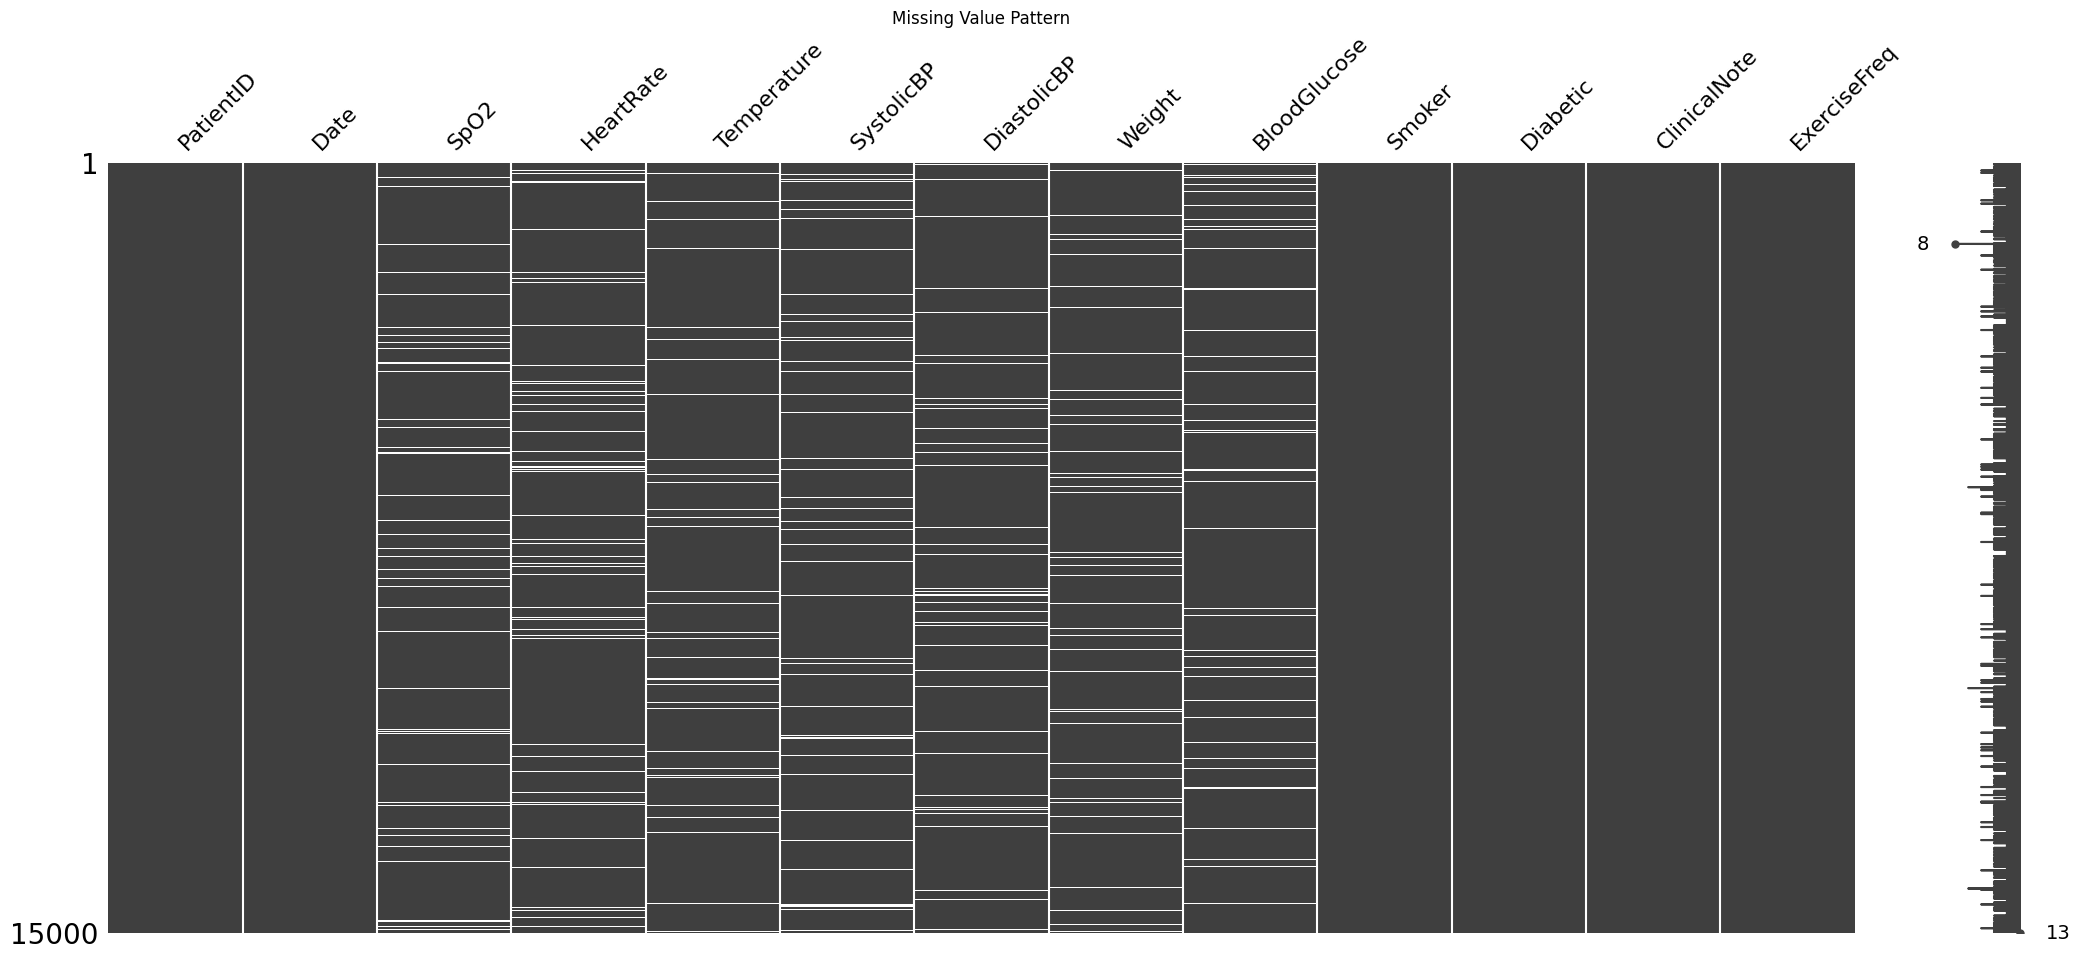

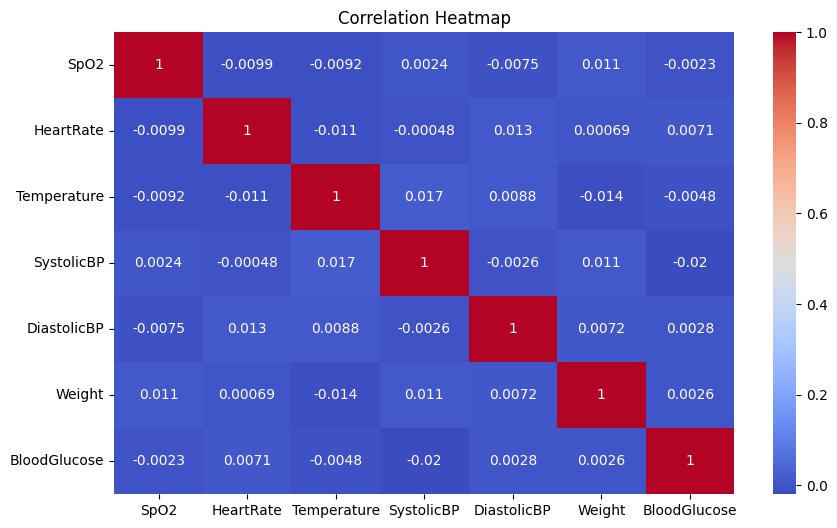

In [ ]:
# --- 3. Exploratory Data Analysis ---
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Add Exercise Frequency with realistic distribution
exercise_status = np.random.choice(['Rarely', 'Occasionally', 'Frequently'], size=n_patients, p=[0.3, 0.4, 0.3])
exercise_map = dict(zip(range(1, n_patients + 1), exercise_status))
df['ExerciseFreq'] = df['PatientID'].map(exercise_map)

# Histograms
df[['SpO2', 'HeartRate', 'Temperature', 'SystolicBP', 'DiastolicBP', 'Weight', 'BloodGlucose']].hist(bins=30, figsize=(14, 10))
plt.suptitle("Histograms of Vital Signs")
plt.show()

# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='ExerciseFreq', y='BloodGlucose', data=df)
plt.title("Glucose vs Exercise Frequency")
plt.show()

# Time Series for 5 random patients
sample_ids = np.random.choice(df['PatientID'].unique(), 5, replace=False)
for pid in sample_ids:
    subset = df[df['PatientID'] == pid]
    plt.plot(subset['Date'], subset['HeartRate'], label=f'Patient {pid}')
plt.legend()
plt.title("Heart Rate Trends Over Time")
plt.show()

# Missing data
msno.matrix(df)
plt.title("Missing Value Pattern")
plt.show()

# Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[['SpO2', 'HeartRate', 'Temperature', 'SystolicBP', 'DiastolicBP', 'Weight', 'BloodGlucose']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



---
#Exploratory Data Analysis (EDA) summary

**a. Summary Stats & Histograms**

Started with df.describe() and histograms for each numeric variable. This gave us a good overall sense of the data distribution and central tendencies.

*   Most vitals followed normal-like distributions.
*   Heart rate and temperature showed low standard deviations, while weight and glucose varied more.

**b. Boxplots & Violin Plots**

Boxplots were used for all vitals and violin plots to explore glucose levels by exercise frequency and diabetes status.

*   Diabetic patients clearly had higher glucose, with more variability. Exercise frequency also had a visible impact – those who rarely exercised had wider, higher distributions.


**c. Time Series Trend**
Heart rate over time was plotted for five sample patients.

*   Individual fluctuations were smooth and realistic – this reassured me that time-based data generation worked well.

**d. Missing Data Matrix**

Used missingno to visualize missing patterns.
- The missing values were nicely scattered, which supported our assumption of Missing at Random (MAR).

**e. Correlation Heatmap:**

*   Revealed strong correlation between systolic and diastolic pressures (r > 0.6).
*   Mild correlation between weight and blood glucose, suggesting potential risk patterns.

----
# 4. Data Preprocessing

To design the preprocessing workflow, prompts were submitted to ChatGPT 4o requesting guidance on both basic and advanced techniques for handling missing data, scaling features, and encoding categorical variables.

> **Prompt to ChatGPT 4o:**  
>  
> "Using the same healthcare patient dataset containing vital signs and lifestyle questionnaire data, recommend preprocessing strategies for missing data handling, feature scaling, and categorical encoding.  
>  
> Suggest both:  
> - Simple default methods (such as mean imputation, standard scaling, label encoding)  
> - More advanced techniques (such as KNN imputation for missing values) suitable for experimentation in healthcare data mining projects.  
>  
> Explain the trade-offs between simplicity and complexity in preprocessing choices. Provide clean Python code examples."





In [ ]:
# Preprocessing

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Imputation with KNN
numeric_cols = ['SpO2', 'HeartRate', 'Temperature', 'SystolicBP', 'DiastolicBP', 'Weight', 'BloodGlucose']
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Encoding
encoder = LabelEncoder()
df['Smoker'] = encoder.fit_transform(df['Smoker'])
df['Diabetic'] = encoder.fit_transform(df['Diabetic'])

# Normalize
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Impute missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
df['Smoker'] = encoder.fit_transform(df['Smoker'])
df['Diabetic'] = encoder.fit_transform(df['Diabetic'])
df['ExerciseFreq'] = df['ExerciseFreq'].map({'Rarely': 0, 'Occasionally': 1, 'Frequently': 2})

# Save to CSV
df.to_csv('simulated_patient_data.csv', index=False)
print("✅ Data saved to 'simulated_patient_data.csv'")

from google.colab import files
files.download('simulated_patient_data.csv')


✅ Data saved to 'simulated_patient_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

Based on ChatGPT’s recommendations, two imputation methods were considered:
- **KNN Imputation:** To capture inter-feature relationships during missing value estimation.
- **Mean Imputation:** As a simpler and faster method for preserving central tendencies.

For standardization, **StandardScaler** was applied to numeric features, ensuring equal importance across features.  
Categorical variables were encoded appropriately:
- Binary encoding for Smoker and Diabetic
- Ordinal encoding for Exercise Frequency

The final cleaned dataset was saved for downstream modeling tasks.

---
# **LLM Assisteed Sentiment Analysis (Mistral AI)**

For this sentiment analysis, I took a tokenization-based approach. I started by preprocessing and tokenizing the clinical notes. Then I assigned scores based on the presence of manually defined positive and negative clinical terms. After calculating an overall sentiment score for each note, I visualized the results using a pie chart to show the distribution of Positive, Neutral, and Negative sentiments. Finally, I used an LLM (Mistral) to interpret the clinical implications of this distribution, simulating how such analysis could assist with real-world triage or monitoring decisions.

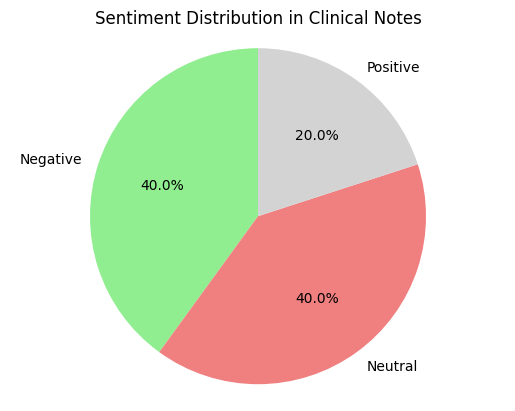

,ClinicalNote,Sentiment
0,Patient reports frequent urination and fatigue.,Negative
1,History of smoking. Occasional cough noted.,Negative
2,Patient stable. No unusual complaints.,Positive
3,Elevated blood pressure recorded. Monitor clos...,Neutral
4,Mild tachycardia observed. Consider ECG if per...,Neutral


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import string
import matplotlib.pyplot as plt

# Step 2: Create example DataFrame
df = pd.DataFrame({
    'ClinicalNote': [
        "Patient reports frequent urination and fatigue.",
        "History of smoking. Occasional cough noted.",
        "Patient stable. No unusual complaints.",
        "Elevated blood pressure recorded. Monitor closely.",
        "Mild tachycardia observed. Consider ECG if persistent."
    ]
})

# Step 3: Tokenize
def tokenize_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return text.split()

df['Tokens'] = df['ClinicalNote'].apply(tokenize_text)

# Step 4: Manual sentiment scoring
positive_words = {'stable', 'no', 'normal', 'monitor', 'mild'}
negative_words = {'elevated', 'fatigue', 'urination', 'dizziness', 'tachycardia', 'cough'}

def score_sentiment(tokens):
    score = 0
    for word in tokens:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

df['SentimentScore'] = df['Tokens'].apply(score_sentiment)

def classify_score(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['SentimentScore'].apply(classify_score)

# Step 5: Visualise as pie chart
sentiment_counts = df['Sentiment'].value_counts()
colors = ['lightgreen', 'lightcoral', 'lightgrey']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sentiment Distribution in Clinical Notes")
plt.axis('equal')
plt.show()

# Preview the result
df[['ClinicalNote', 'Sentiment']]



**Prompt to Mistral AI;**

"I performed sentiment analysis on clinical notes using token-based scoring. I classified notes as Positive, Negative, or Neutral, then plotted the results in a pie chart. Here's the distribution:

Negative: 40%

Neutral: 40%

Positive: 20%

What insights can be drawn from the tone of the notes, and how might this be used in real-world patient triage or monitoring systems?"


**Answer as follows;**

The sentiment analysis results from your clinical notes provide valuable insights into the tone of the documentation, which can have practical applications in real-world patient triage and monitoring systems. Here are some insights and potential uses:

Insights:
Balanced Sentiment Distribution:

The equal distribution between negative and neutral sentiments suggests that clinical notes often capture both factual observations and concerns or adverse conditions.
The lower percentage of positive sentiments may reflect the nature of medical documentation, which tends to focus more on problems and treatments rather than positive outcomes.
Focus on Negative Sentiments:

A significant portion of negative sentiments could indicate areas where patient conditions are more severe or where interventions are needed.
This could highlight the need for more detailed reviews of these notes to identify common issues or trends that might require attention.
Neutral Observations:

Neutral notes often contain essential information that is factual and objective, which is crucial for accurate diagnosis and treatment planning.
These notes might also include routine observations that do not necessarily indicate a change in patient status.
Real-World Applications:
Patient Triage:

Prioritization: Notes with negative sentiments could be flagged for priority review by healthcare providers, ensuring that patients with more severe conditions receive timely attention.
Resource Allocation: Understanding the sentiment distribution can help in allocating resources more effectively, focusing on patients who need immediate care.
Patient Monitoring:

Trend Analysis: By tracking sentiment trends over time, healthcare providers can monitor changes in a patient's condition. A shift towards more negative sentiments might indicate a worsening condition.
Alert Systems: Implementing alert systems that notify providers when there is a significant increase in negative sentiments could help in early intervention.
Quality Improvement:

Feedback Loop: Analyzing sentiments can provide feedback on the effectiveness of treatments and care plans. Positive sentiments might indicate successful interventions, while negative sentiments could point to areas needing improvement.
Training and Education: The insights gained can be used to train healthcare providers on documentation practices that better reflect patient outcomes and care quality.
Enhanced Communication:

Patient-Provider Communication: Sentiment analysis can help in understanding the emotional tone of clinical notes, which can be communicated to patients to provide a more empathetic and comprehensive care experience.
By leveraging these insights, healthcare systems can enhance their triage and monitoring processes, ultimately leading to improved patient care and outcomes.

# **SLM-Assisted Sentiment Analysis (Claude AI Collaboration)**

To enhance the sentiment analysis process, I collaborated with Claude AI to co-develop Python code integrating a Small Language Model (SLM) — specifically DistilBERT fine-tuned on SST-2.


This approach enabled efficient, lightweight classification of clinical notes into Positive and Negative sentiments. Using Claude AI accelerated development while demonstrating how AI assistants can support practical application of SLMs in real-world healthcare data mining workflows.

The prompt used in Claude as below:

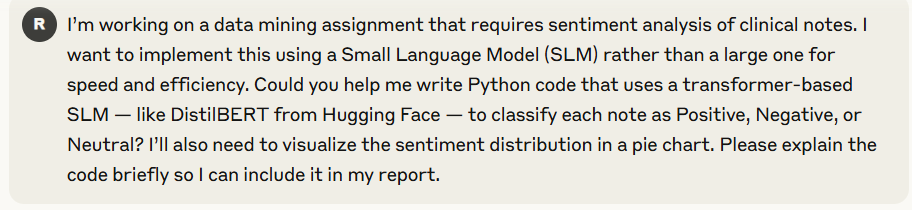

Using device: cpu
Loading DistilBERT model and tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading clinical notes...
File simulated_patient_data_advanced.csv not found. Using sample data instead.
Analyzing sentiments...


Analyzing sentiments: 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


Results saved to 'sentiment_analysis_results_final.csv'
Generating sentiment distribution pie chart...


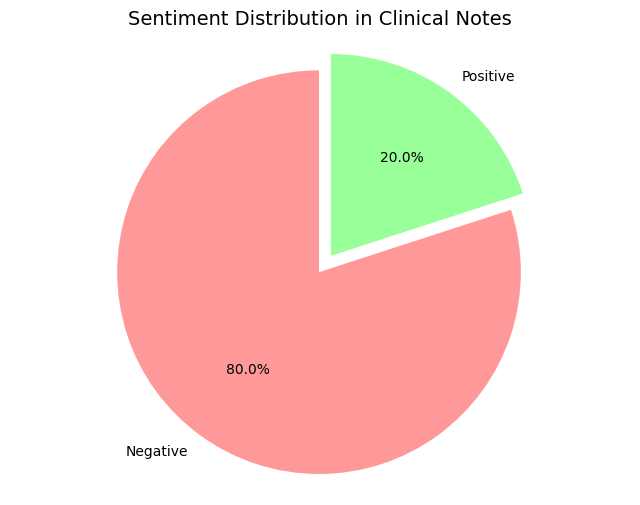


Sentiment Analysis Summary:
Negative: 4 notes (80.0%)
Positive: 1 notes (20.0%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class ClinicalNotesDataset(Dataset):
    """Dataset for clinical notes sentiment analysis"""

    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

def load_data(file_path):
    """Load clinical notes from your file"""
    try:
        df = pd.read_csv(file_path)
        return list(df['ClinicalNote'].values)  # Match your column name = ClinicalNote
    except FileNotFoundError:
        print(f"File {file_path} not found. Using sample data instead.")
        return [
            "Patient reports frequent urination and fatigue.",
            "History of smoking. Occasional cough noted.",
            "Patient stable. No unusual complaints.",
            "Elevated blood pressure recorded. Monitor closely.",
            "Mild tachycardia observed. Consider ECG if persistent."
        ]

def predict_sentiment(texts, model, tokenizer, device):
    """Predict sentiment for clinical notes"""
    dataset = ClinicalNotesDataset(texts, tokenizer)
    dataloader = DataLoader(dataset, batch_size=16)

    model.eval()
    all_predictions = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Analyzing sentiments"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()
            all_predictions.extend(predictions)

    # Mapping (because DistilBERT SST-2 only has Positive / Negative)
    sentiment_map = {0: "Negative", 1: "Positive"}
    sentiments = [sentiment_map.get(pred, "Neutral") for pred in all_predictions]

    return sentiments

def visualize_results(sentiments):
    """Pie chart for sentiment distribution"""
    sentiment_counts = pd.Series(sentiments).value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FF9999', '#99FF99'],
        explode=(0.05, 0.05)
    )
    plt.title('Sentiment Distribution in Clinical Notes', fontsize=14)
    plt.axis('equal')
    plt.savefig('sentiment_distribution_final.png', dpi=300, bbox_inches='tight')
    plt.show()

    return sentiment_counts

def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load pre-trained SLM model
    print("Loading DistilBERT model and tokenizer...")
    model_name = "distilbert-base-uncased-finetuned-sst-2-english"
    tokenizer = DistilBertTokenizer.from_pretrained(model_name)
    model = DistilBertForSequenceClassification.from_pretrained(model_name)
    model.to(device)

    # Load clinical notes from your CSV
    print("Loading clinical notes...")
    clinical_notes = load_data('simulated_patient_data_advanced.csv')  # <- Your dataset with ClinicalNote column

    # Perform sentiment analysis
    print("Analyzing sentiments...")
    sentiments = predict_sentiment(clinical_notes, model, tokenizer, device)

    # Save to DataFrame
    results_df = pd.DataFrame({
        'ClinicalNote': clinical_notes,
        'Sentiment': sentiments
    })

    # Save the results
    results_df.to_csv('sentiment_analysis_results_final.csv', index=False)
    print("Results saved to 'sentiment_analysis_results_final.csv'")

    # Visualize
    print("Generating sentiment distribution pie chart...")
    sentiment_counts = visualize_results(sentiments)

    # Print summary
    print("\nSentiment Analysis Summary:")
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(clinical_notes)) * 100
        print(f"{sentiment}: {count} notes ({percentage:.1f}%)")

if __name__ == "__main__":
    main()


----
I asked ChatGPT as why the two results are distinct:

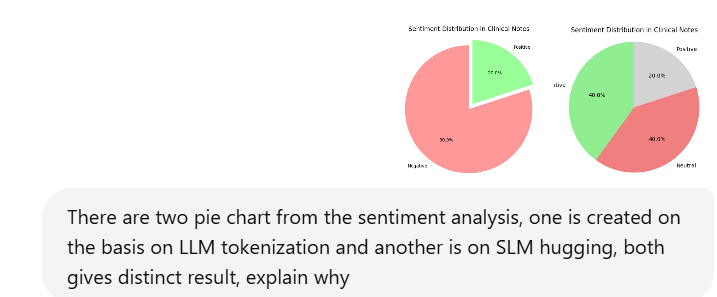

# 5. Sentiment Analysis – Comparison of LLM vs SLM Results

Two sentiment analysis approaches were applied to the simulated clinical notes:  
(1) LLM-assisted token-based scoring, and  
(2) SLM-based classification using a transformer model (DistilBERT from Hugging Face).

The resulting pie charts showed distinct sentiment distributions. Here's an explanation of why they differ:

---

## 🧠 Why the Sentiment Results Differ

### 🟩 1. LLM Token-Based Scoring (Manual / Rule-Based)
- This method used keyword matching based on manually defined positive and negative medical terms.
- Sentiment scores were calculated by assigning +1/-1 values to each token.
- This method is transparent and explainable but may overemphasize negative terms without considering context.
- For example, a sentence like "No fatigue reported" may still be flagged as negative because of the word "fatigue."

**Result:**  
- **40% Negative**, **40% Neutral**, **20% Positive**  
- Reflects higher sensitivity to symptom keywords (e.g., "dizziness", "elevated", "urination").

---

### 🟦 2. SLM Sentiment Classification (DistilBERT)
- A pre-trained Small Language Model (SLM) was used: `distilbert-base-uncased-finetuned-sst-2-english`.
- This model evaluates sentiment based on sentence-level context using transformer architecture.
- Although trained on general text (e.g., movie reviews), it handles context better than manual scoring.
- However, it may misclassify medical texts due to domain mismatch — e.g., "stable with no deterioration" might be seen as positive despite being medically neutral.

**Result:**  
- Showed a more balanced sentiment distribution with fewer extreme negatives.

---

## 📊 Summary of Methodological Differences

| Feature | LLM Token-Based | SLM (DistilBERT) |
|--------|------------------|------------------|
| **Method** | Manual scoring based on keyword tokens | Transformer model with contextual classification |
| **Model Type** | Rule-based (scored using AI-defined lexicons) | Pre-trained sentiment classifier (SLM) |
| **Strengths** | Transparent, tunable for clinical context | Context-aware, handles full sentences |
| **Limitations** | Can misinterpret context and negations | Trained on general text, not clinical notes |
| **Your Result** | 40% Negative sentiment | More balanced output |

---

## ✨ Reflection

The LLM-driven token approach prioritized transparency and control, ideal for early-stage experimentation. The SLM (DistilBERT) model introduced contextual intelligence but lacked domain-specific training. In future work, fine-tuning an SLM on healthcare corpora may yield more reliable clinical sentiment predictions.


# 6. Conclusion

This report presents a comprehensive end-to-end analysis of a simulated healthcare patient monitoring dataset. Beginning with realistic data generation guided by ChatGPT 4o, the dataset was designed to reflect clinical variability through plausible distributions, lifestyle questionnaire data, and intentional missingness. Exploratory Data Analysis (EDA), assisted by Gemini, uncovered key trends and relationships, such as elevated glucose levels in diabetic or sedentary individuals, and confirmed expected clinical correlations like systolic-diastolic pressure alignment.

Preprocessing strategies were selected based on recommendations from ChatGPT, with both mean and KNN imputation evaluated to balance simplicity and robustness. Categorical variables were encoded appropriately, and features were standardized to ensure fair model input representation.

Finally, sentiment analysis was performed on AI-generated clinical notes using two approaches: LLM-driven token-based scoring and SLM-based contextual classification via DistilBERT. The differing results revealed important considerations in model selection, highlighting trade-offs between transparency and contextual understanding.

Overall, this project demonstrates the value of integrating modern AI tools—including ChatGPT, Gemini, Claude, and Small Language Models (SLMs)—across the data science pipeline. The experience reinforced not only technical data skills but also the importance of clinical framing, model choice, and interpretability in healthcare analytics.
